In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

--2023-04-23 08:41:53--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   231MB/s    in 1.8s    

2023-04-23 08:41:55 (231 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’ saved [430460776/430460776]

dpkg: warning: downgrading libcudnn8 from 8.7.0.84-1+cuda11.8 to 8.1.0.77-1+cuda11.2
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.7.0.84-1+cuda11.8) ...
Setting up libcudnn8 (8.1.0.77-1+c

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!wget https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
!unzip mrcnn_demo_PIBVGJTEFX.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline


--2023-04-23 08:44:25--  https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
Resolving psfiles.link (psfiles.link)... 34.90.26.83
Connecting to psfiles.link (psfiles.link)|34.90.26.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59799 (58K) [application/zip]
Saving to: ‘mrcnn_demo_PIBVGJTEFX.zip’

mrcnn_demo_PIBVGJTE 100%[===================>]  58.40K  --.-KB/s    in 0.1s    

2023-04-23 08:44:26 (599 KB/s) - ‘mrcnn_demo_PIBVGJTEFX.zip’ saved [59799/59799]

Archive:  mrcnn_demo_PIBVGJTEFX.zip
   creating: maskrcnn_colab/
   creating: maskrcnn_colab/mrcnn_demo/
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
  inflating: maskrcnn_colab/mrcnn_demo/parallel_model.py  
  inflating: maskrcnn_colab/mrcnn_demo/utils.py  
  inflating: maskrcnn_colab/mrcnn_demo/visualize.py  
VERS 0.5 - updated 11/03/2023


/content/maskrcnn_colab/mrcnn_demo/model.py:2378: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


... done downloading pretrained model!


In [ ]:
# Extract Images
images_path = "/content/drive/MyDrive/Colab Notebooks/dataset.zip"
annotations_path = "/content/drive/MyDrive/Colab Notebooks/annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 986 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/Colab Notebooks/annotations.json
Annotation json path:  /content/drive/MyDrive/Colab Notebooks/annotations.json
Train: 876
Validation: 109
Classes: 1


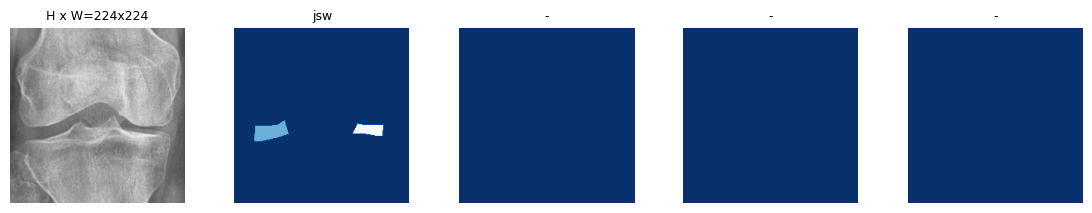

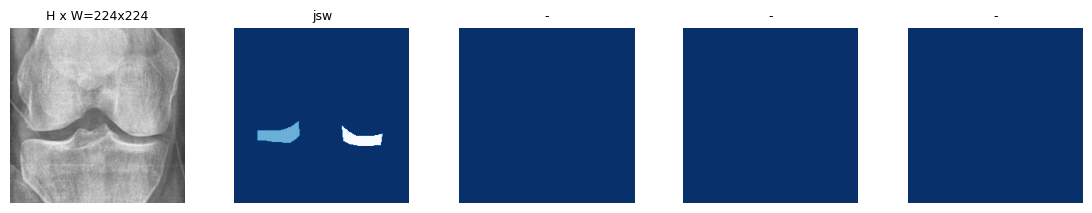

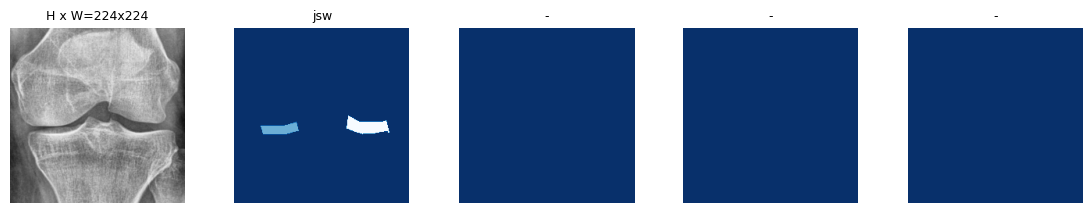

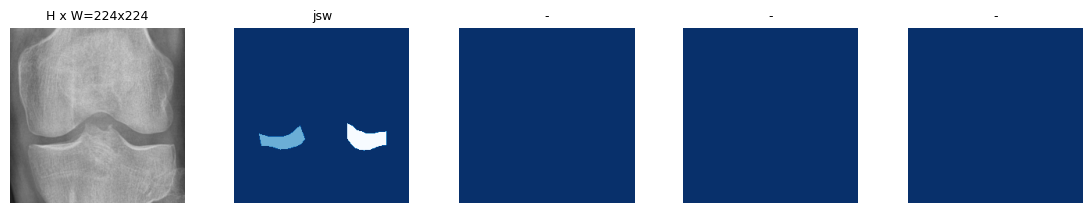

In [ ]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/content/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20230423T0846/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Instructions for updating:
Use fn_output_signature instead


Loading weights from  /content/maskrcnn_colab/logs/object20230423T0846/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    2.00000  max:  246.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    2.00000  max:  246.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -121.70000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


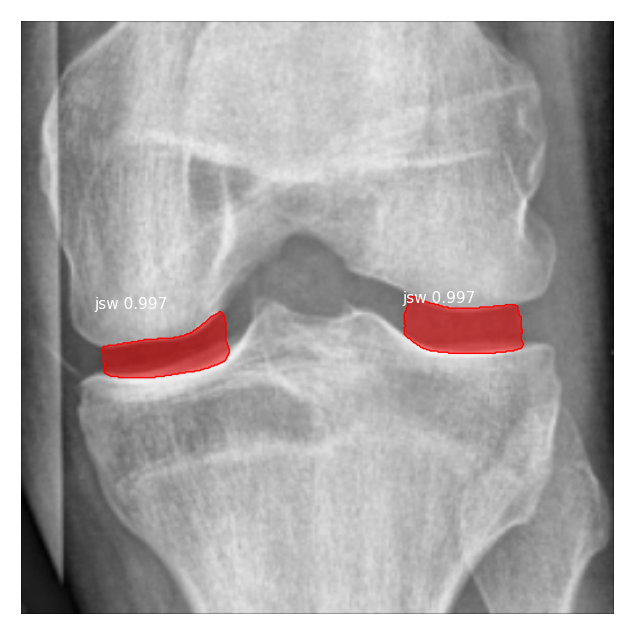

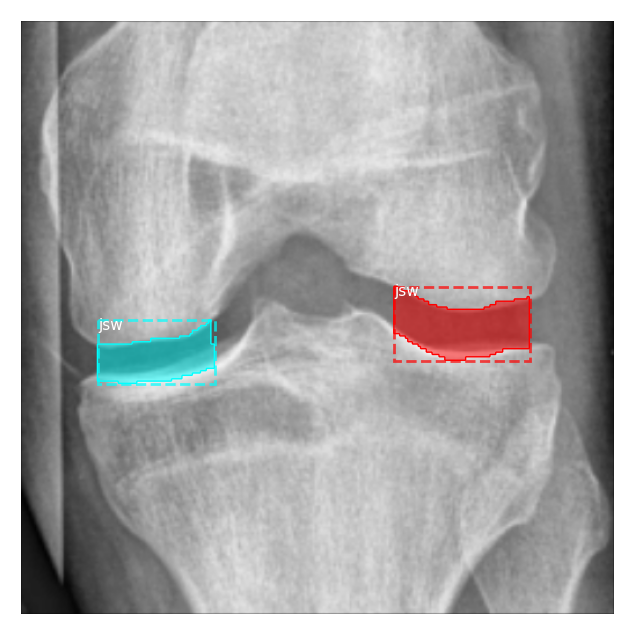

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

In [ ]:
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline
# Load Image
img = cv2.imread("/content/2.png")

test_model, inference_config = load_inference_model(1, "/content/maskrcnn_colab/logs/object20230423T0846/mask_rcnn_object_0001.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

Loading weights from  /content/maskrcnn_colab/logs/object20230423T0846/mask_rcnn_object_0001.h5
Re-starting from epoch 1


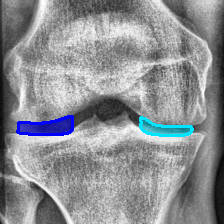

2


In [ ]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
setc = []
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    setc.append(contours)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

cv2_imshow(img)
print(len(setc))

In [ ]:
annotations_file = "/content/drive/MyDrive/Colab Notebooks/annotations.json"

In [ ]:
import os
import json
import cv2
import numpy as np

total_iou = 0
tot=0
toto = 0;
def calculate_iou(mask1, mask2):
    if mask1.shape == mask2.shape:
      intersection = np.logical_and(mask1, mask2)
      union = np.logical_or(mask1, mask2)
      iou = np.sum(intersection) / np.sum(union)
      return iou


# Path to your dataset directory
dataset_dir = "/content/drive/MyDrive/Colab Notebooks/dataset"

# Iterate over each image in the dataset
cnt = 0
for image_file in os.listdir(dataset_dir):
    cnt+=1
    if image_file.endswith(".png"):
        # Load the image
        image = cv2.imread(os.path.join(dataset_dir, image_file))

        # Predict object masks using the Mask R-CNN model
        results = test_model.detect([image])[0]

        # Find the ground truth masks for this image
        gt_masks = []
        for i in annotations['annotations']:
            if i["image_id"] == cnt:
                gt_mask = np.zeros(image.shape[:2], dtype=np.uint8)
                polygon = np.array(i["segmentation"]).reshape((-1, 2)).astype(np.int32)
                cv2.fillPoly(gt_mask, [polygon], color=1)
                gt_masks.append(gt_mask)


        ious = 0
        for i in range(len(gt_masks)):
          if(len(results['class_ids'])==1):
            ious = max(ious,calculate_iou(results["masks"][:, :, 0], gt_masks[0]))
            ious = max(calculate_iou(results["masks"][:, :, 0], gt_masks[1]), ious)
            break

          else:
            ious = max(ious,calculate_iou(results["masks"][:, :, i], gt_masks[i]))
            if(len(gt_masks)==2): ious = max(ious,calculate_iou(results["masks"][:, :, i], gt_masks[abs(1-i)]))
        
          iou = ious
          
          total_iou+=iou
          tot+=1


In [ ]:
print('Intersection over union score is: ',total_iou/tot)

Intersection over union score is:  0.7321714224489796
